<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Decisiontree(company_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
### Load the required libraries
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import preprocessing
from sklearn import tree

In [99]:
#importing dataset
company = pd.read_csv("/content/Company_Data (1).csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [100]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [101]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [102]:
#Changing "ShelveLoc","Urban",  "US" datatype to categorical
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [103]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [104]:
#### Correlation Matrix
corr = company.corr()
corr

<ipython-input-104-92c70e00572d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = company.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [105]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


<Axes: >

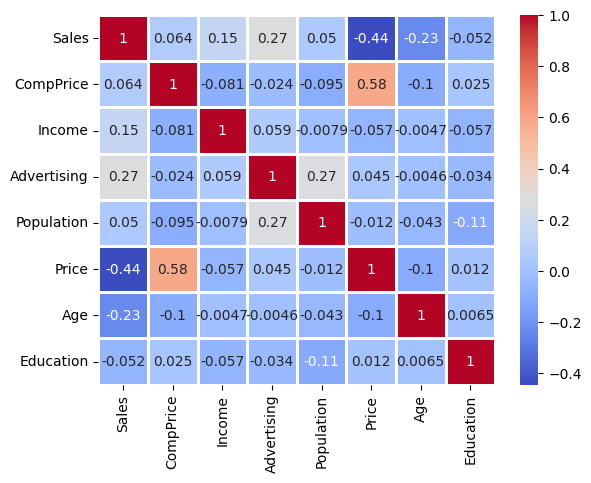

In [106]:
#Correlation Plot
fig, ax = plt.subplots()
#fig.set_size_inches(15, 10)
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=2)

In [107]:
#Building Decision Tree Classifier using Entropy Criteria
array = company.values
X = array[:,1:11]
y = array[:,0]
y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [108]:
x=company.iloc[:,0:6]
y=company['ShelveLoc']

In [109]:
# Test-Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (320, 6)
y_train (320,)
x_test (80, 6)
y_test (80,)


In [111]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

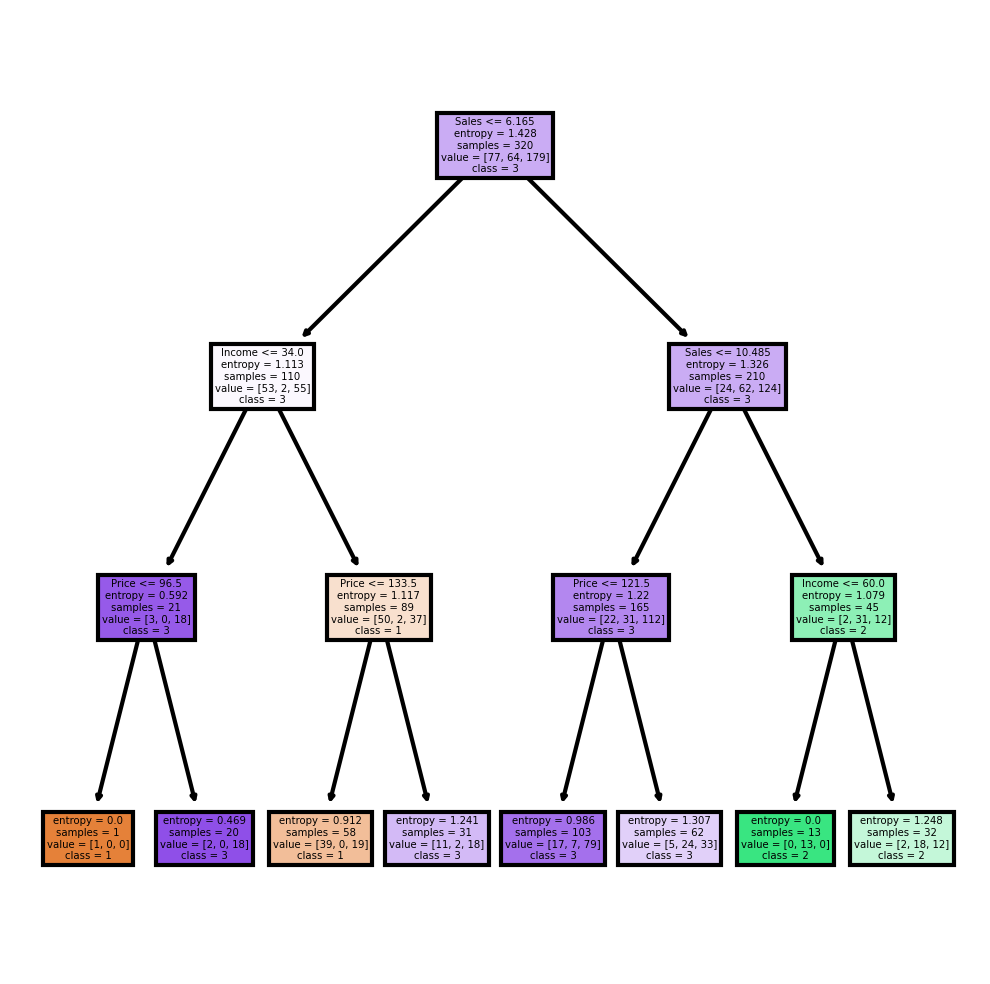

In [112]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [113]:
#model 1-Entropy based splits
dt1_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =3)
dt1_entropy.fit(x_train, y_train)
print('Train Accuracy =',dt1_entropy.score(x_train, y_train))
print('Test Accuracy =',dt1_entropy.score(x_test, y_test))

Train Accuracy = 0.684375
Test Accuracy = 0.55


In [114]:
### Model 2 - default parameters
from sklearn import tree
dt2_gini = tree.DecisionTreeClassifier()   ## Instantiating DecisionTree-Classifier
dt2_gini.fit(x_train, y_train)             

DecisionTreeClassifier()

In [115]:
print('Train Accuracy =',dt1_gini.score(x_train, y_train))
print('Test Accuracy =',dt1_gini.score(x_test, y_test))

Train Accuracy = 1.0
Test Accuracy = 0.525


In [116]:
## Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,dt2_gini.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,dt2_gini.predict(x_test)))

Train - Confusion Matrix
[[ 77   0   0]
 [  0  64   0]
 [  0   0 179]]
Test - Confusion Matrix
[[ 7  1 11]
 [ 0 13  8]
 [15  5 20]]


In [117]:
## Important variables
features = x_train.columns
importances = dt1_gini.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([x_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5
0,Sales,Income,Price,CompPrice,Advertising,Population
1,0.305995,0.182236,0.160705,0.129022,0.117962,0.104081


In [118]:
importances

array([0.30599503, 0.12902166, 0.18223569, 0.11796197, 0.10408093,
       0.16070471])

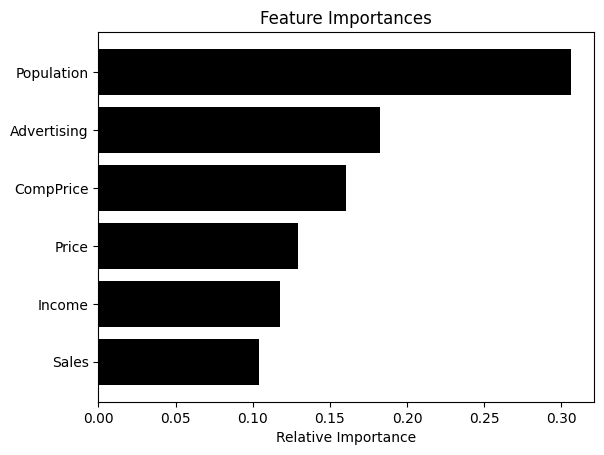

In [119]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [120]:
#Building Decision Tree Model using Variable Importance
indices

array([0, 2, 5, 1, 3, 4])

In [121]:
select = indices[0:5]
imp_tree = tree.DecisionTreeClassifier(max_depth=3)   ## Instantiating DecisionTree-Classifier
clf = imp_tree.fit(x_train.iloc[:,select], y_train)

In [122]:
print('Train Accuracy =',imp_tree.score(x_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(x_test.iloc[:,select], y_test))

Train Accuracy = 0.696875
Test Accuracy = 0.6


In [123]:
## Randomized Hyper-parameter search with cross-validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier() 

param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'max_depth':np.arange(3,15,1),
             }


rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch_acc.fit(x_train, y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(x_test, y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(x_test)))


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=19)
Train Accuracy = 0.6125
Test Accuracy = 0.55
Train - Confusion Matrix
[[ 40   2  35]
 [  0  31  33]
 [ 19  12 148]]
Test - Confusion Matrix
[[ 4  1 14]
 [ 0 13  8]
 [10  3 27]]


In [124]:
### Making predictions
predicted= pd.DataFrame(rsearch_acc.predict(x_train))
company['predicted'] = predicted
company.to_csv("company_predictions.csv")